[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90.]
[3.89932886e-03 1.11879195e-02 1.76174497e-02 2.54362416e-02
 3.11610738e-02 3.69865772e-02 4.19530201e-02 4.51275168e-02
 4.87181208e-02 5.13489933e-02 5.23020134e-02 5.31946309e-02
 5.29530201e-02 5.08322148e-02 4.87315436e-02 4.64026846e-02
 4.46308725e-02 4.06510067e-02 3.87449664e-02 3.48255034e-02
 3.17248322e-02 2.90134228e-02 2.55906040e-02 2.16711409e-02
 1.89261745e-02 1.67114094e-02 1.44362416e-02 1.15906040e-02
 1.02281879e-02 8.83892617e-03 6.97986577e-03 5.46308725e-03
 4.66442953e-03 3.59731544e-03 2.72483221e-03 2.48322148e-03
 1.89932886e-03 1.65100671e-03 1.13422819e-03 1.00000000e-03
 6.57718121e-04 5.0

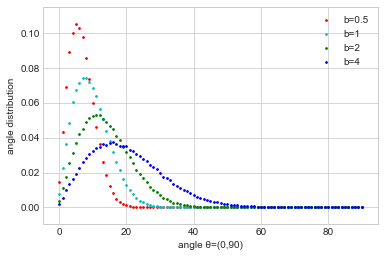

In [40]:
##to estimate the bending angles
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize, special
from numpy import *
from pylab import *
import decimal
import matplotlib as mpl
import random
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn-whitegrid")
Lp=50
n=150
ALL=1000
theta=90
##load the data saved in D disc, give the values to lists named config1-4
config1=np.load('D:Configurations.npy')
config2=np.load('D:configurationsWithlb=0.5.npy')
config3=np.load('D:configurationsWithlb=1.npy')
config4=np.load('D:configurationsWithlb=4.npy')

##compute angle distribution by simulation
i=0
k=0
c1=0
c2=0
c3=0
c4=0
tt1=np.zeros(ALL+1,dtype='float64')
tt2=np.zeros(ALL+1,dtype='float64')
tt3=np.zeros(ALL+1,dtype='float64')
tt4=np.zeros(ALL+1,dtype='float64')

distribution1=np.zeros(theta+1,dtype='float64')
distribution2=np.zeros(theta+1,dtype='float64')
distribution3=np.zeros(theta+1,dtype='float64')
distribution4=np.zeros(theta+1,dtype='float64')

angle=np.zeros(theta+1,dtype='float64')
i=0

while i<91:
    angle[i]=i
    i=i+1
else:
    i=0

i=0
k=0
while k<ALL:

    while i<149:
        t1=config1[k][i]    
        T1=config1[k][i+1]
        tt1[k]=abs(np.dot(t1,T1))
        c1=math.acos(tt1[k])
        C1=math.degrees(c1)
        ic1=int(C1)
        if ic1<C1:
            distribution1[ic1]=distribution1[ic1]+1
        else:
            distribution[ic1-1]=distribution[ic1-1]+1
        
        t2=config2[k][i]    
        T2=config2[k][i+1]
        tt2[k]=abs(np.dot(t2,T2))
        c2=math.acos(tt2[k])
        C2=math.degrees(c2)
        ic2=int(C2)
        
        if ic2<C2:
            distribution2[ic2]=distribution2[ic2]+1
        else:
            distribution2[ic2-1]=distribution2[ic2-1]+1
        
        t3=config3[k][i]    
        T3=config3[k][i+1]
        tt3[k]=abs(np.dot(t3,T3))
        c3=math.acos(tt3[k])
        C3=math.degrees(c3)
        ic3=int(C3)
        if ic3<C3:
            distribution3[ic3]=distribution3[ic3]+1
        else:
            distribution3[ic3-1]=distribution3[ic3-1]+1
        
        t4=config4[k][i]    
        T4=config4[k][i+1]
        tt4[k]=abs(np.dot(t4,T4))
        c4=math.acos(tt4[k])
        C4=math.degrees(c4)
        ic4=int(C4)
        if ic4<C4:
            distribution4[ic4]=distribution4[ic4]+1
        else:
            distribution4[ic4-1]=distribution4[ic4-1]+1
        
        i=i+1      
    else:
        
        i=0
        k=k+1

else: 
    
    i=0
while i<90:
    distribution1[i]=distribution1[i]/(1000*149)
    distribution2[i]=distribution2[i]/(1000*149)
    distribution3[i]=distribution3[i]/(1000*149)
    distribution4[i]=distribution4[i]/(1000*149)
    i=i+1
else:
    i=0
   
    plt.scatter(angle,distribution2,c='r',s=3,label="b=0.5")
    plt.scatter(angle,distribution3,c='c',s=3,label="b=1")
    plt.scatter(angle,distribution1,c='green',s=3,label="b=2")      
    plt.scatter(angle,distribution4,c='b',s=3,label="b=4")

    plt.xlabel('angle θ=(0,90)')
    plt.ylabel('angle distribution')
    legend(loc='upper right')
    print(angle)
    print(distribution1)
    print(distribution2)
    print(distribution3)
    print(distribution4)
plt.show()